## Time-series Analysis & Stationarity Check

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from IPython.display import display
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)


#### Data preparation

In [4]:
df = pd.read_excel("Данные-рус Обработанные.xlsx")
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
3,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
4,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88


In [5]:
# remove first two rows (blank)
df = df.drop(index=df.index[:2]).reset_index(drop=True)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
2,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88
3,КРС,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,554.41,504.35,493.56,445.51,585.79,316.47,469.49,...,1520.51,1747.09,915.8,1851.96,932.63,945.11,1142.92,1637.64,1180.54,1045.69
4,КРС,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,178.3,362.86,352.49,451.79,228.32,708.84,280.55,...,1055.43,110.45,188.15,172.63,112.31,134.99,1212.02,260.02,129.38,159.66


In [6]:
# Set the first row as column labels
df.columns = df.iloc[0]  # Assign first row as header
df = df[1:].reset_index(drop=True)  # Drop the first row and reset index
df.sample(5)


,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
338,Птицы,Сельхозпредприятия,КОСТАНАЙСКАЯ ОБЛАСТЬ,339.88,299.85,296.56,344.67,443.54,365.5,297.53,...,1109.13,1112.05,1037.46,613.28,543.77,1460.86,1224.46,1252.81,1246.09,1371.34
327,Верблюды,Хозяйства населения,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,...,12.1,NaN,NaN,26.3,NaN,2.2,0.4,NaN,1.4,1.2
509,Яйца,Хозяйства населения,АЛМАТИНСКАЯ ОБЛАСТЬ,11535,9709,15405,13203,22274,17342,17342,...,1531.8,1726.8,1268.9,2313.7,1490.6,1909.4,1724.6,1605.3,1703.3,2014.2
495,Яйца,Крестьянские или фермерские хозяйства,ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,81,91.8,147.7,147.9,170.6,171.9,171.9,...,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет
267,Верблюды,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,1,0.2,44.7,25.4,0,57.5,76.87,...,4.8,16.4,11.2,12,6,16,4.5,6.1,4.6,6.2


In [7]:
df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', '    АКМОЛИНСКАЯ ОБЛАСТЬ',
       '    АКТЮБИНСКАЯ ОБЛАСТЬ', '    АЛМАТИНСКАЯ ОБЛАСТЬ',
       '    АТЫРАУСКАЯ ОБЛАСТЬ', '    ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ЖАМБЫЛСКАЯ ОБЛАСТЬ', '    КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       '    КОСТАНАЙСКАЯ ОБЛАСТЬ', '    КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ',
       '    МАНГИСТАУСКАЯ ОБЛАСТЬ', '    ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ПАВЛОДАРСКАЯ ОБЛАСТЬ', '    СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ', '    ГАСТАНА', '    ГАЛМАТЫ',
       '    ГШЫМКЕНТ', '    ТУРКЕСТАНСКАЯ ОБЛАСТЬ', '    ОБЛАСТЬ ЖЕТІСУ',
       '    ОБЛАСТЬ ҰЛЫТАУ', '    ОБЛАСТЬ АБАЙ'], dtype=object)

In [8]:
df["Регион"] = df["Регион"].str.strip()
rename_dict = {
    "ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ", 
    "ГАЛМАТЫ": "ГОРОД АЛМАТЫ",
    "ГАСТАНА": "ГОРОД АСТАНА",
    "ГШЫМКЕНТ": "ГОРОД ШЫМКЕНТ",  
    "ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",  
}

# Rename regions in the index
df["Регион"] = df["Регион"].replace(rename_dict)

df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', 'АКМОЛИНСКАЯ ОБЛАСТЬ',
       'АКТЮБИНСКАЯ ОБЛАСТЬ', 'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'КАРАГАНДИНСКАЯ ОБЛАСТЬ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ПАВЛОДАРСКАЯ ОБЛАСТЬ',
       'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ГОРОД АСТАНА', 'ГОРОД АЛМАТЫ', 'ГОРОД ШЫМКЕНТ',
       'ТУРКЕСТАНСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ',
       'ОБЛАСТЬ АБАЙ'], dtype=object)

In [9]:
# Filter the df
df = df[df['Показатель'] == "Лошади"]
# df = df.drop(columns=["Показатель", "Категория хозяйства"])
df.sample(5)

,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
258,Лошади,Хозяйства населения,ГОРОД АЛМАТЫ,0,0,0,0,0,0,0,...,0,0,0.7,1.5,0,0,0,0,0,0.4
231,Лошади,Крестьянские или фермерские хозяйства,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,39.92,53.4,113.95,73.45,66.9,95.5,101.39,...,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет
201,Лошади,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,7.37,6.58,17.99,12.35,16.29,21.25,14.99,...,1.35,8.2,5.77,2,1.57,1.24,0.67,1.5,4.75,3.68
237,Лошади,Крестьянские или фермерские хозяйства,ГОРОД ШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,...,16,14.7,27.1,11.9,23.1,32.6,9.8,6,7.2,6.2
215,Лошади,Сельхозпредприятия,ГОРОД ШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,...,12.34,0,0,NaN,NaN,0,NaN,0,0,0


In [10]:
# Sum only the last two columns, grouped by "Регион"
df_sum = df.groupby("Регион")[df.columns[3:]].sum().reset_index()
df_sum


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,АКМОЛИНСКАЯ ОБЛАСТЬ,1292.32,704.43,721.88,742.1,1041.54,1903.37,921.07,791.98,1162.77,...,1074.61,852.53,1126.55,2123.03,1113.91,995.56,1304.96,1013.53,2212.19,1876.09
1,АКТЮБИНСКАЯ ОБЛАСТЬ,714.67,517.97,998.79,997.0,619.51,1598.56,515.91,611.95,1025.32,...,1554.73,1422.49,1438.45,2569.91,1203.41,973.73,1772.95,1911.34,3120.12,4772.26
2,АЛМАТИНСКАЯ ОБЛАСТЬ,1558.77,1160.78,3029.59,796.15,827.19,3031.95,693.89,2782.58,3034.64,...,2940.25,983.9,746.07,2097.7,364.17,1573.54,2522.07,1535.1,2563.15,5168.28
3,АТЫРАУСКАЯ ОБЛАСТЬ,454.16,520.24,506.03,400.49,793.42,472.8,306.81,380.74,573.72,...,887.7,548.9,924.2,878.9,485.3,683.3,1180.0,1064.9,1411.84,2715.72
4,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,956.37,968.54,1543.85,1609.77,1869.51,3189.46,1653.06,3080.85,3208.7,...,545.55,987.47,1167.97,2232.18,1568.38,1694.58,2388.17,1805.18,2375.43,3235.58
5,ГОРОД АЛМАТЫ,11.94,0,0.8,9.95,26.67,0,0,0,0,...,0,0,0.7,1.5,0,0,0,0,0,0.4
6,ГОРОД АСТАНА,3.97,2.67,5.67,3.44,3.12,3.13,2.63,2.95,3.76,...,4.4,1.8,1.8,1.2,0.99,1.8,1.8,2,3.0,6.1
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,56.44,41.4,44.2,30.4,63.4,42.4,34.8,44,55.1,78.0
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,1200.16,722.34,1313.43,815.0,1209.38,1380.0,464.12,1345.17,1624.43,...,1509.3,912.27,1510.78,2160.7,567.3,1742.9,2303.53,1405.9,1636.1,1029.92
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,705.34,651.39,839.46,669.0,495.52,1144.01,643.92,411.48,593.21,...,1073.09,982.9,916.4,1604.36,501.65,609.67,1386.95,776.47,1380.59,3056.44


In [11]:
# convert date columns to datetime format
df_sum.columns = list(df_sum.columns[:1]) + list(pd.to_datetime(df_sum.columns[-120:]))
df_sum = df_sum.rename(columns={col: col.strftime("%Y-%m-%d") for col in df_sum.columns[-120:]})
df_sum.sample(5)


,Регион,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
12,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,337.78,332.26,411.66,386.95,443.41,412.32,296.34,338.47,430.57,...,722.0,727.52,683.02,1139.98,1046.42,624.89,803.3,940.25,861.61,1488.29
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,1200.16,722.34,1313.43,815.0,1209.38,1380.0,464.12,1345.17,1624.43,...,1509.3,912.27,1510.78,2160.7,567.3,1742.9,2303.53,1405.9,1636.1,1029.92
10,КАРАГАНДИНСКАЯ ОБЛАСТЬ,2461.81,773.07,1123.91,1002.44,1086.72,2407.09,783.83,1344.94,1767.49,...,1195.59,1174.95,1198.78,3412.44,904.67,1277.95,2785.86,1091.65,1696.98,7053.88
15,ОБЛАСТЬ ЖЕТІСУ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,1409.9,362.31,298.6,3084.55,225.4,1580.6,1976.4,1158.11,1405.9,2867.79
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,705.34,651.39,839.46,669.0,495.52,1144.01,643.92,411.48,593.21,...,1073.09,982.9,916.4,1604.36,501.65,609.67,1386.95,776.47,1380.59,3056.44


C:\Users\Acer\AppData\Local\Temp\ipykernel_17736\1807079648.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sum.replace("нетнетнет", np.nan, inplace=True)


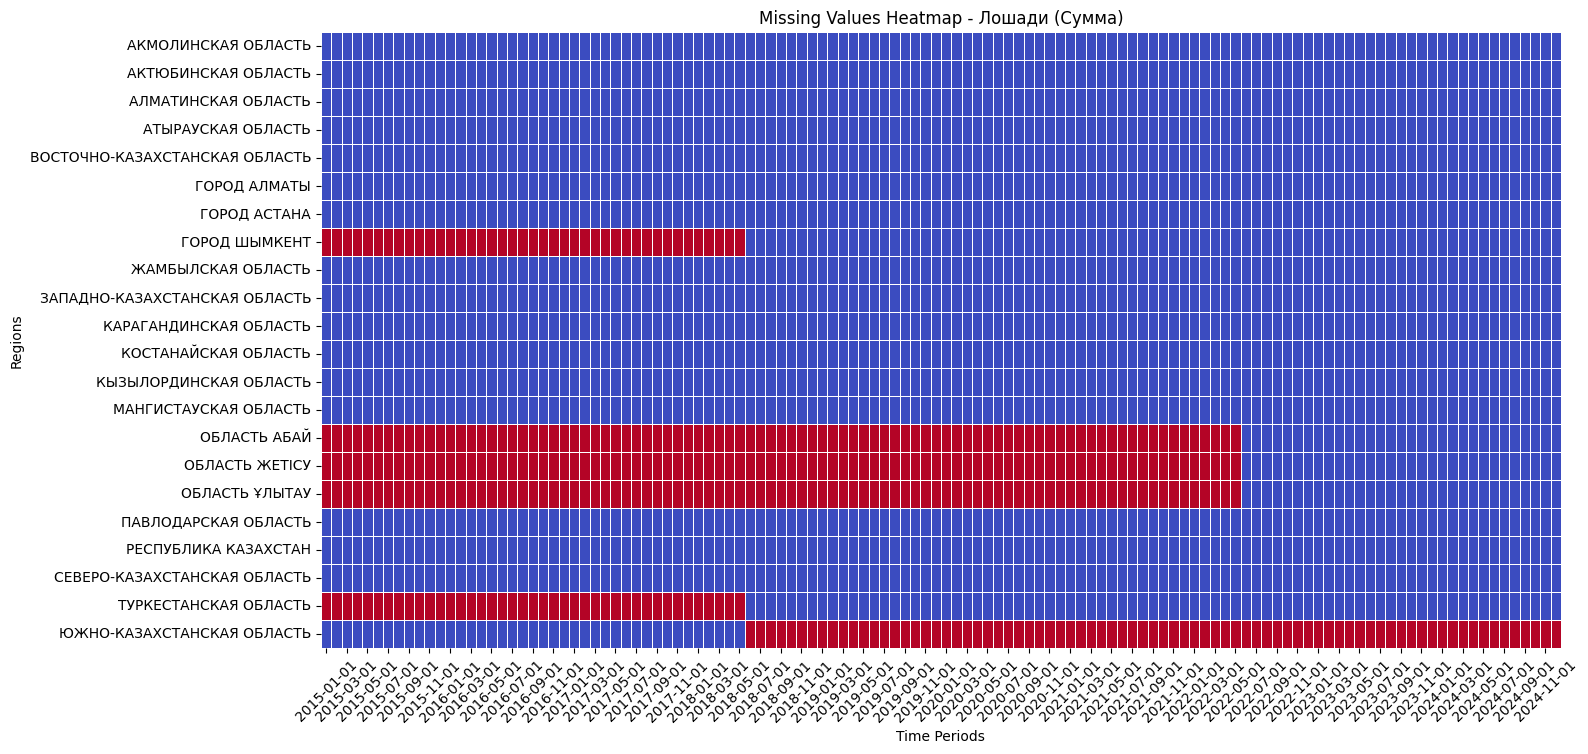

In [12]:
# Replace "нетнетнет" with NaN for easier handling
df_sum.replace("нетнетнет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_sum_numeric = df_sum.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_sum_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Лошади (Сумма)')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Convert from wide format to long format
df_sum_melted = df_sum.melt(id_vars=["Регион"], var_name="Месяц", value_name="Объем")
df_sum_melted.sample(5)

,Регион,Месяц,Объем
2216,ОБЛАСТЬ ҰЛЫТАУ,2023-05-01,410.39
1910,РЕСПУБЛИКА КАЗАХСТАН,2022-03-01,21003.54
336,ГОРОД АСТАНА,2016-04-01,4.14
1104,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2019-03-01,2161.80
1492,РЕСПУБЛИКА КАЗАХСТАН,2020-08-01,21751.26


In [14]:
# Convert date column to datetime
df_sum_melted["Месяц"] = pd.to_datetime(df_sum_melted["Месяц"])

# Set index for time-series analysis
df_sum_melted = df_sum_melted.sort_values(["Регион", "Месяц"]).set_index(["Регион", "Месяц"])

df_sum_melted

Объем
Регион                     Месяц              
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  1292.32
                           2015-02-01   704.43
                           2015-03-01   721.88
                           2015-04-01   742.10
                           2015-05-01  1041.54
...                                        ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01      NaN
                           2024-09-01      NaN
                           2024-10-01      NaN
                           2024-11-01      NaN
                           2024-12-01      NaN

[2640 rows x 1 columns]

In [15]:
# Replace "нет" with NaN
df_sum_melted = df_sum_melted.replace("нетнетнет", np.nan)
df_sum_melted.isna().groupby("Регион").mean() * 100

,Объем
Регион,
АКМОЛИНСКАЯ ОБЛАСТЬ,0.000000
АКТЮБИНСКАЯ ОБЛАСТЬ,0.000000
АЛМАТИНСКАЯ ОБЛАСТЬ,0.000000
АТЫРАУСКАЯ ОБЛАСТЬ,0.000000
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0.000000
ГОРОД АЛМАТЫ,0.000000
ГОРОД АСТАНА,0.000000
ГОРОД ШЫМКЕНТ,34.166667
ЖАМБЫЛСКАЯ ОБЛАСТЬ,0.000000


In [16]:
# Filter the df
df_shp = df[(df['Показатель'] == "Лошади") & (df['Категория хозяйства'] == "Сельхозпредприятия")]
df_shp = df_shp.drop(columns=["Показатель", "Категория хозяйства"])
df_shp = df_shp.sort_values(by="Регион", ascending=True)

df_shp.sample(5)


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
198,РЕСПУБЛИКА КАЗАХСТАН,260.54,316.9,240.41,287.94,372.04,344.38,343.21,301.24,292.65,...,1744.97,1488.28,1796.53,4663.87,1991.38,1606.23,3525.02,2402.55,4179.18,6908.63
218,ОБЛАСТЬ ҰЛЫТАУ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,1.9,0,0,0,0,13.6,0,0,0,0
215,ГОРОД ШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,12.34,0,0,NaN,NaN,0,NaN,0,0,0
213,ГОРОД АСТАНА,1.1,0.64,1.4,1,0.68,1.66,0.7,0.24,0.67,...,1,NaN,NaN,NaN,0.39,NaN,0.6,NaN,0.6,NaN
205,КАРАГАНДИНСКАЯ ОБЛАСТЬ,9.26,16.37,15.7,16.04,9.43,14.09,5.08,13.31,49.01,...,109.69,179.65,45.38,128.74,125.77,118.05,51.46,44.45,48.08,74.88


C:\Users\Acer\AppData\Local\Temp\ipykernel_17736\4187901975.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shp.replace("нет", np.nan, inplace=True)


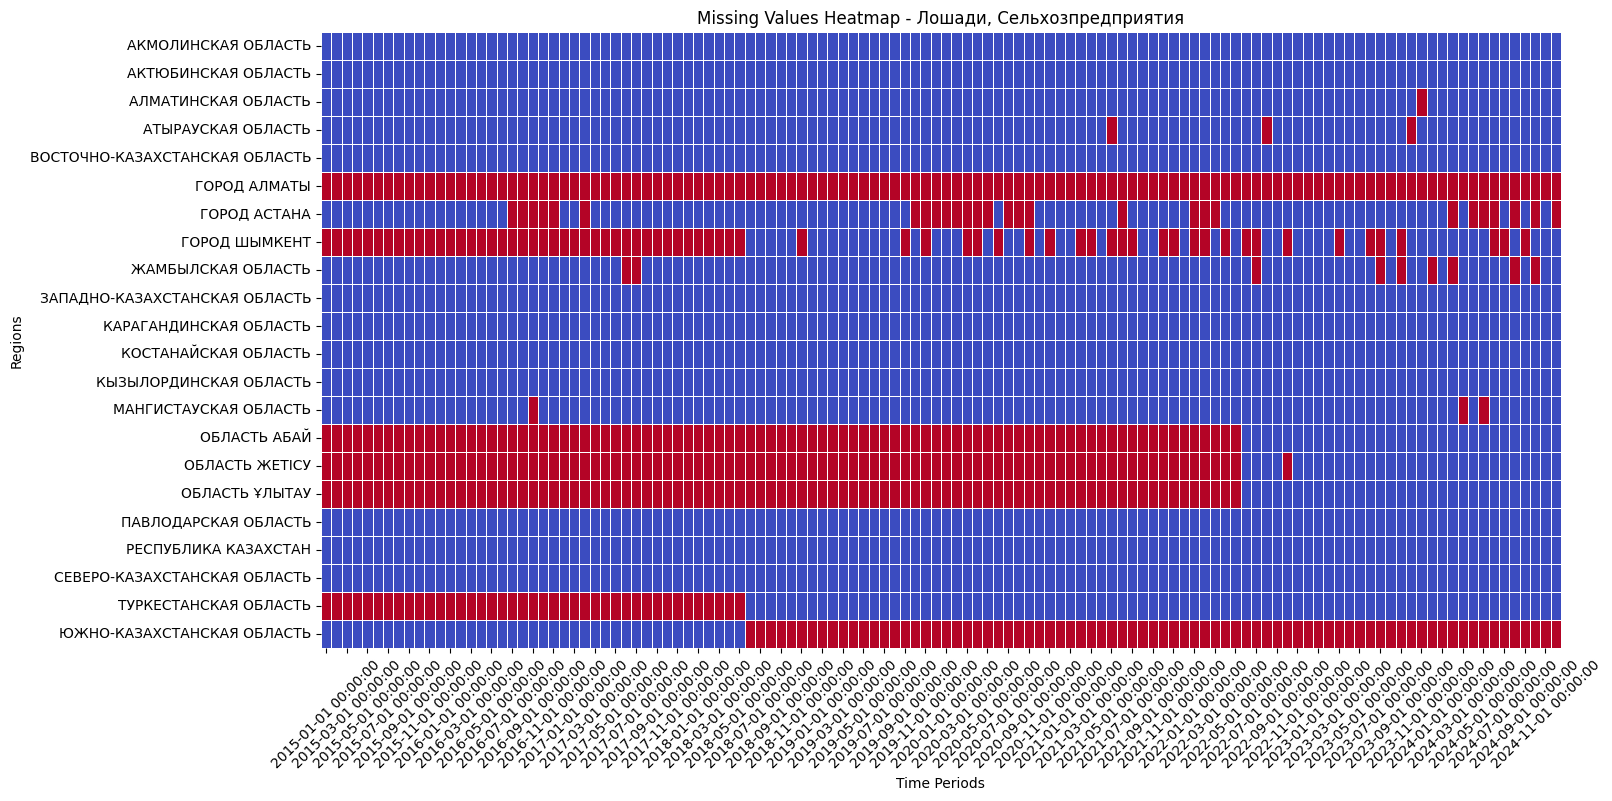

In [17]:
# Replace "нетнетнет" with NaN for easier handling
df_shp.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_shp_numeric = df_shp.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_shp_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Лошади, Сельхозпредприятия')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Filter the df
df_kfh = df[(df['Показатель'] == "Лошади") & (df['Категория хозяйства'] == "Крестьянские или фермерские хозяйства")]
df_kfh = df_kfh.drop(columns=["Показатель", "Категория хозяйства"])
df_kfh = df_kfh.sort_values(by="Регион", ascending=True)

df_kfh.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
239,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,583.1,240,70.5,1020.5,47,134.7,397.1,165.6,519.9,822
233,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,260.73,29.73,18.47,90.22,98.91,74.62,49.62,120.78,196.7,...,149,266.7,210.8,232,126.5,313.7,454,136.8,213,105.45
241,ОБЛАСТЬ АБАЙ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,1856.85,1755.2,2180.3,4554.7,2585.48,4382.68,5216.5,2388.7,1526.3,4072.3
224,АТЫРАУСКАЯ ОБЛАСТЬ,110.94,105.25,159.03,137.88,337.9,181.7,76.2,148.26,140.04,...,260.4,161.5,390.3,308.1,154.6,214,371.2,230,566.9,1249.7
229,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,35.89,41.1,59.16,37.89,33.13,111.61,23.29,55.93,64.6,...,116.3,108.8,113.5,376.4,61.4,51.8,121.9,141,161.3,468.2


C:\Users\Acer\AppData\Local\Temp\ipykernel_17736\3722002426.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kfh.replace("нет", np.nan, inplace=True)


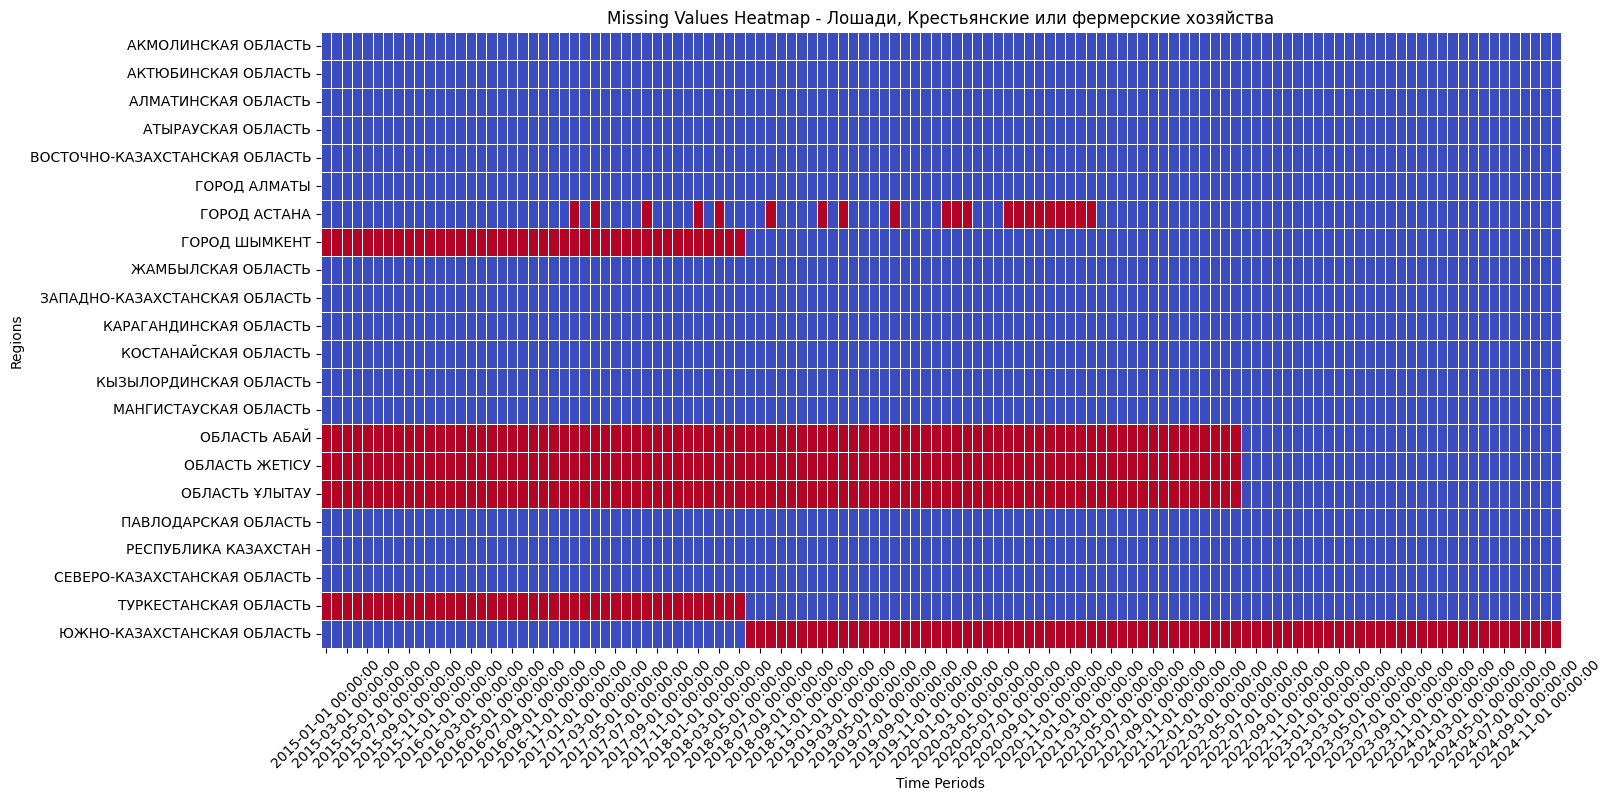

In [19]:
# Replace "нетнетнет" with NaN for easier handling
df_kfh.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_kfh_numeric = df_kfh.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_kfh_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Лошади, Крестьянские или фермерские хозяйства')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Filter the df
df_hn = df[(df['Показатель'] == "Лошади") & (df['Категория хозяйства'] == "Хозяйства населения")]
df_hn = df_hn.drop(columns=["Показатель", "Категория хозяйства"])
df_hn = df_hn.sort_values(by="Регион", ascending=True)

df_hn.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
253,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,1315.1,1331.3,1255.27,1591.7,1206.7,1771.3,1398.17,1419.21,1325.7,...,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет
259,ГОРОД ШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,28.1,26.7,17.1,18.5,40.3,9.8,25,38,47.9,71.8
245,АЛМАТИНСКАЯ ОБЛАСТЬ,1479.8,1072,2486.4,630.8,736.3,2439.9,559.6,2345.4,2630.6,...,2214.8,753.4,602.5,1458.9,300.4,1017.1,1870.4,906.5,1785,2882.8
257,ГОРОД АСТАНА,2.87,1.64,3.49,2.05,2.05,1.08,1.54,2.32,1.55,...,3.4,1.8,1.8,1.2,0.6,1.8,1.2,2,2.4,6.1
256,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,406.87,585.55,794.16,817.32,944.25,2134.95,871.88,1935.46,1494.2,...,345.2,548.3,596,1207.9,896.7,1232.3,1555.7,1291.2,1694.4,1241.7


C:\Users\Acer\AppData\Local\Temp\ipykernel_17736\3165364856.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hn.replace("нет", np.nan, inplace=True)


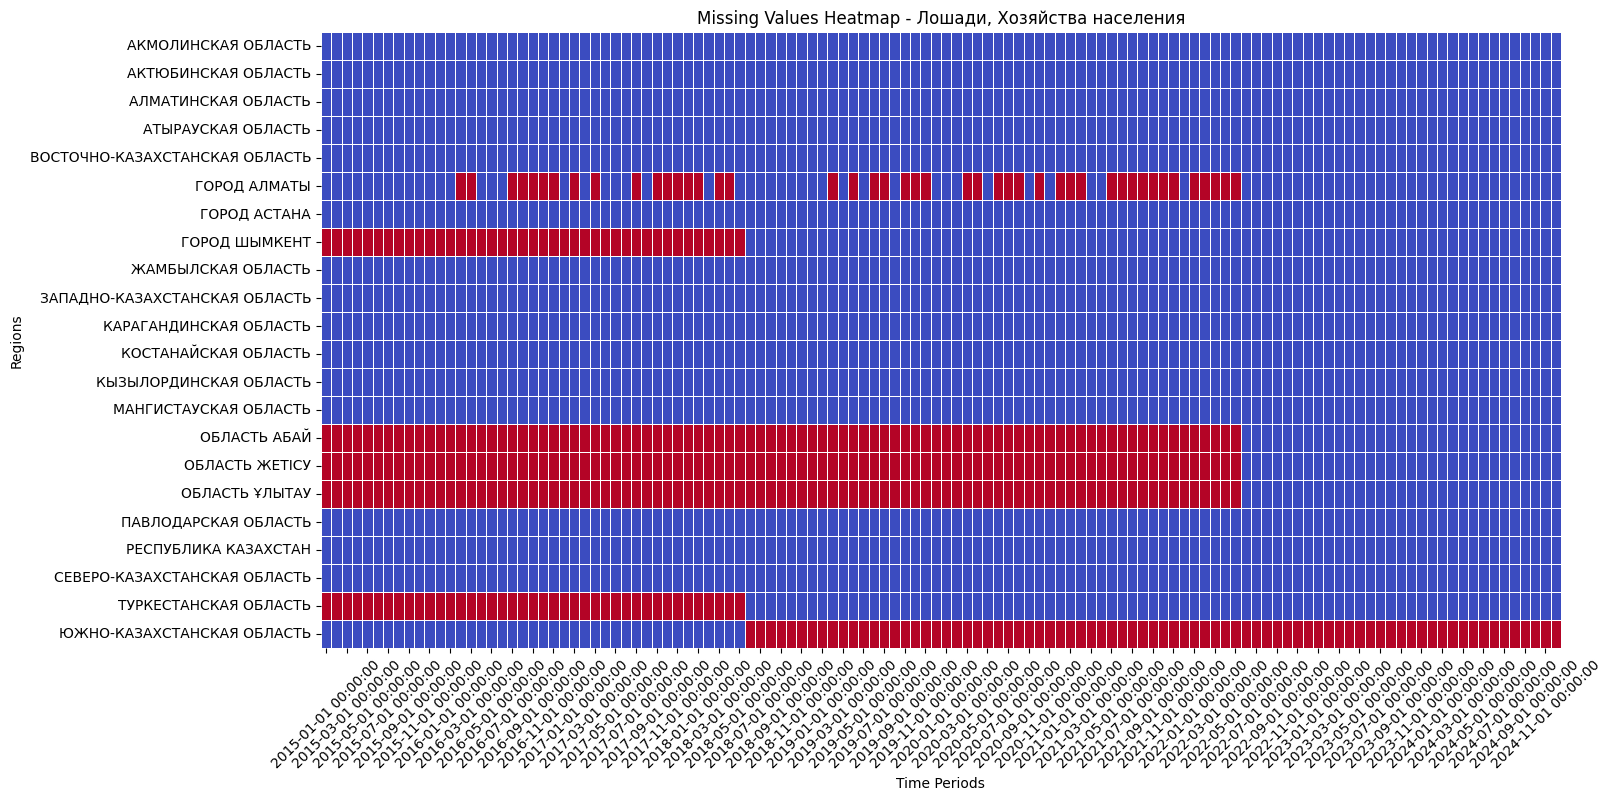

In [21]:
# Replace "нетнетнет" with NaN for easier handling
df_hn.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_hn_numeric = df_hn.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_hn_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Лошади, Хозяйства населения')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [22]:
df_sum_melted

Объем
Регион                     Месяц              
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  1292.32
                           2015-02-01   704.43
                           2015-03-01   721.88
                           2015-04-01   742.10
                           2015-05-01  1041.54
...                                        ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01      NaN
                           2024-09-01      NaN
                           2024-10-01      NaN
                           2024-11-01      NaN
                           2024-12-01      NaN

[2640 rows x 1 columns]

In [23]:
# Reset index if needed
df_stats = df_sum_melted.reset_index()

# Calculate basic descriptive stats for each region
region_stats = df_stats.groupby("Регион")["Объем"].agg([
    "count", "min", "max", "mean", "median", "std"
]).rename(columns={
    "count": "Кол-во значений",
    "min": "Мин.",
    "max": "Макс.",
    "mean": "Среднее",
    "median": "Медиана",
    "std": "Ст. откл."
})

# Display result
display(region_stats.sort_values(by="Среднее", ascending=False))


,Кол-во значений,Мин.,Макс.,Среднее,Медиана,Ст. откл.
Регион,,,,,,
РЕСПУБЛИКА КАЗАХСТАН,120,9373.68,60187.38,22141.563750,19070.570,10075.768675
ОБЛАСТЬ АБАЙ,31,1136.36,6953.75,3951.431613,3691.630,1738.577273
ТУРКЕСТАНСКАЯ ОБЛАСТЬ,79,1513.29,8733.53,2876.841266,2406.680,1325.891234
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,120,537.16,7244.11,2826.633667,2370.440,1601.841211
АЛМАТИНСКАЯ ОБЛАСТЬ,120,349.43,7800.32,2503.736500,2117.855,1721.648644
КАРАГАНДИНСКАЯ ОБЛАСТЬ,120,717.47,9619.60,2202.410667,1442.240,1855.518865
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,41,1350.75,2925.21,1850.457317,1697.810,395.388943
ПАВЛОДАРСКАЯ ОБЛАСТЬ,120,750.89,4776.34,1684.560750,1524.205,813.778501
АКТЮБИНСКАЯ ОБЛАСТЬ,120,515.91,5123.90,1637.637583,1400.540,1026.365724


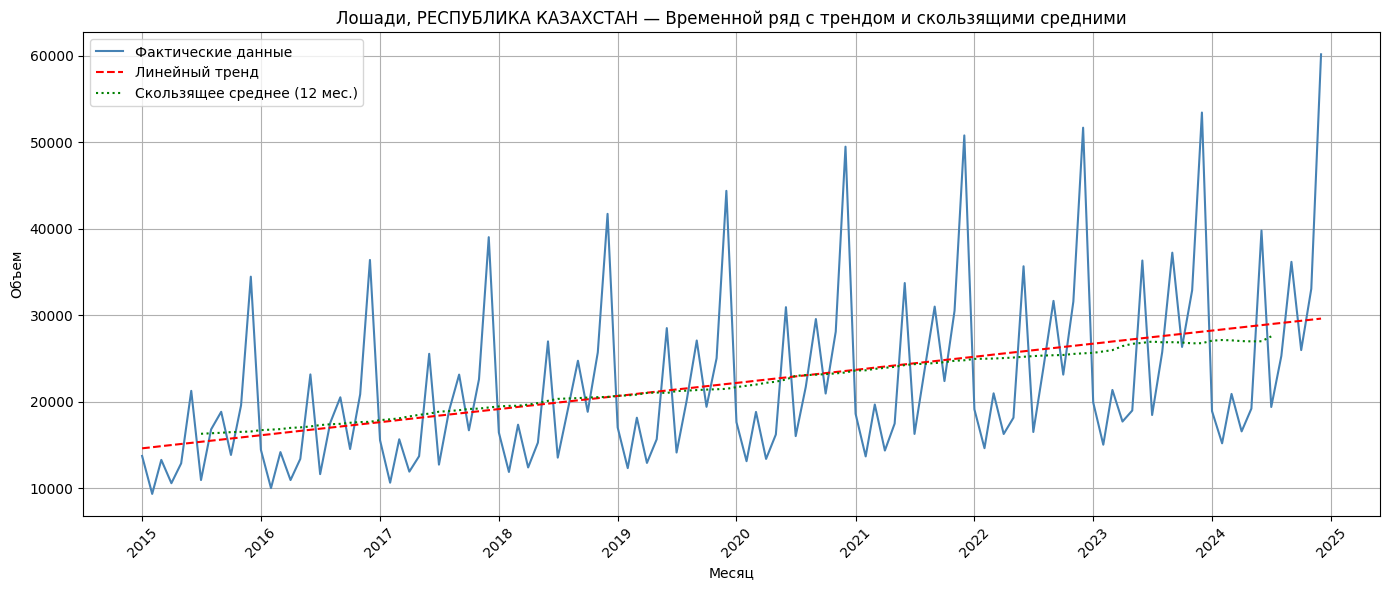

In [24]:
# Filter for national level
national_data = df_stats[df_stats["Регион"] == "РЕСПУБЛИКА КАЗАХСТАН"].copy()

# Ensure 'Месяц' is datetime
national_data["Месяц"] = pd.to_datetime(national_data["Месяц"])

# Create time index as integer (months since start)
national_data = national_data.sort_values("Месяц")
national_data["t"] = range(len(national_data))  # 0, 1, 2, ..., N

# Trend line
coeffs = np.polyfit(national_data["t"], national_data["Объем"], deg=1)
trend = np.poly1d(coeffs)

# Moving Averages
national_data["MA_12"] = national_data["Объем"].rolling(window=12, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))

# Actual data
plt.plot(national_data["Месяц"], national_data["Объем"], label="Фактические данные", color="steelblue")

# Trend line
plt.plot(national_data["Месяц"], trend(national_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# Moving Averages
plt.plot(national_data["Месяц"], national_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# Labels and style
plt.title("Лошади, РЕСПУБЛИКА КАЗАХСТАН — Временной ряд с трендом и скользящими средними")
plt.xlabel("Месяц")
plt.ylabel("Объем")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

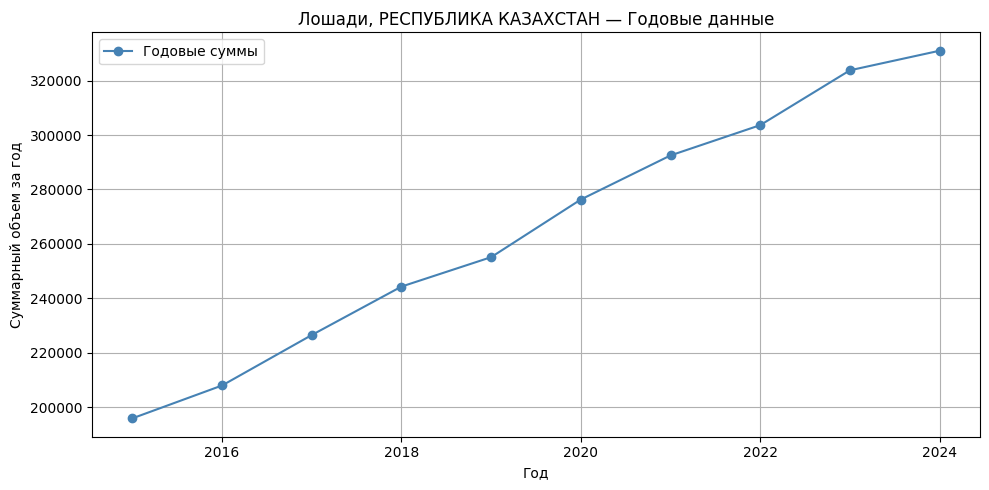

In [28]:
# Aggregate by year (sum)
national_data["Год"] = national_data["Месяц"].dt.year
annual_data = national_data.groupby("Год")["Объем"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))

# Actual yearly data
plt.plot(annual_data["Год"], annual_data["Объем"], marker='o', label="Годовые суммы", color="steelblue")

# Labels and style
plt.title("Лошади, РЕСПУБЛИКА КАЗАХСТАН — Годовые данные")
plt.xlabel("Год")
plt.ylabel("Суммарный объем за год")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# # Filter for national level
# aktobe_data = df_stats[df_stats["Регион"] == "АКТЮБИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# aktobe_data["Месяц"] = pd.to_datetime(aktobe_data["Месяц"])

# # Create time index as integer (months since start)
# aktobe_data = aktobe_data.sort_values("Месяц")
# aktobe_data["t"] = range(len(aktobe_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(aktobe_data["t"], aktobe_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# aktobe_data["MA_12"] = aktobe_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(aktobe_data["Месяц"], aktobe_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(aktobe_data["Месяц"], trend(aktobe_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(aktobe_data["Месяц"], aktobe_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКТЮБИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [25]:
# # Filter for national level
# akmola_data = df_stats[df_stats["Регион"] == "АКМОЛИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# akmola_data["Месяц"] = pd.to_datetime(akmola_data["Месяц"])

# # Create time index as integer (months since start)
# akmola_data = akmola_data.sort_values("Месяц")
# akmola_data["t"] = range(len(akmola_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(akmola_data["t"], akmola_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# akmola_data["MA_12"] = akmola_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(akmola_data["Месяц"], akmola_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(akmola_data["Месяц"], trend(akmola_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(akmola_data["Месяц"], akmola_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКМОЛИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [26]:
# # Filter for national level
# kyzylorda_data = df_stats[df_stats["Регион"] == "КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# kyzylorda_data["Месяц"] = pd.to_datetime(kyzylorda_data["Месяц"])

# # Create time index as integer (months since start)
# kyzylorda_data = kyzylorda_data.sort_values("Месяц")
# kyzylorda_data["t"] = range(len(kyzylorda_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(kyzylorda_data["t"], kyzylorda_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# kyzylorda_data["MA_12"] = kyzylorda_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(kyzylorda_data["Месяц"], trend(kyzylorda_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()